In [81]:
import csv
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from pprint import pprint
sns.set(style="darkgrid")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = pandas.read_csv("./data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
fill = {'Age': data['Age'].mean(skipna=True),
        'Embarked': data['Embarked'].mode()[0]}

data.fillna(fill, inplace=True)

In [7]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
sex_l = LabelEncoder()
emb_l = LabelEncoder()
data['Sex'] = sex_l.fit_transform(data['Sex'])
data['Embarked'] = emb_l.fit_transform(data['Embarked'])
print(sex_l.classes_, sex_l.transform(sex_l.classes_))
print(emb_l.classes_, emb_l.transform(emb_l.classes_))

['female' 'male'] [0 1]
['C' 'Q' 'S'] [0 1 2]


In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


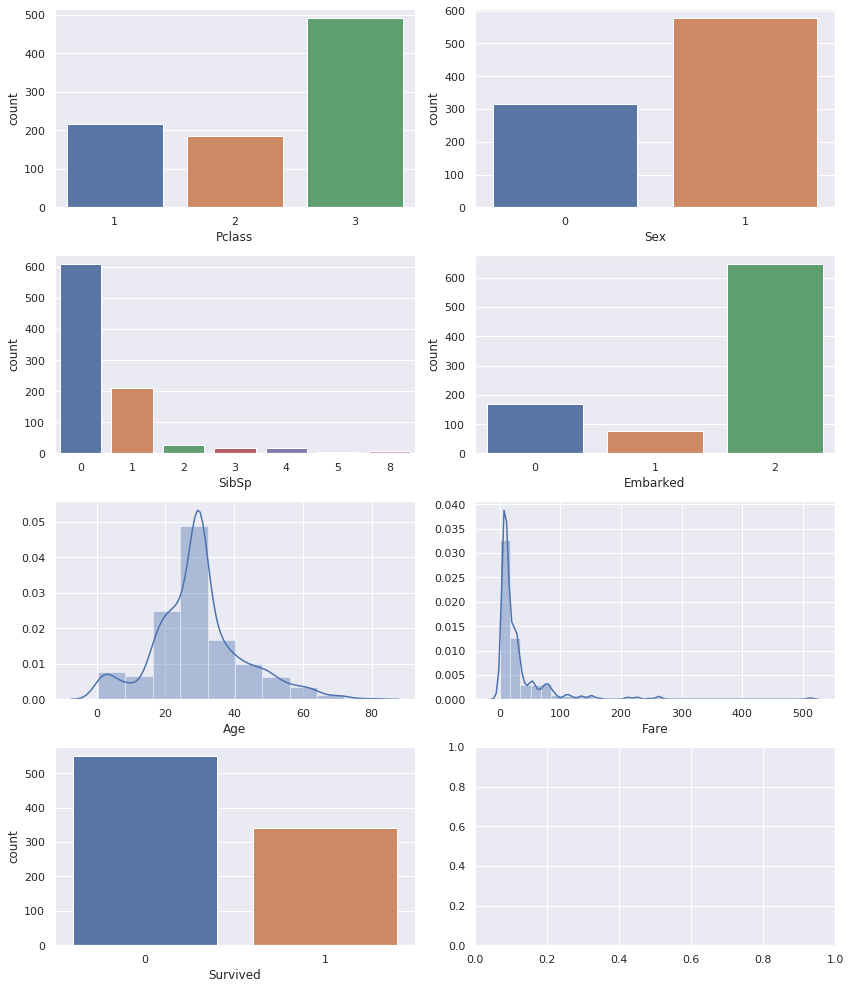

In [10]:
f, axes = plt.subplots(4, 2, figsize=(12,14))
f.tight_layout(pad=2)
sns.countplot(x=data['Pclass'], ax=axes[0, 0])
sns.countplot(x=data['Sex'], ax=axes[0, 1])
sns.countplot(x=data['SibSp'], ax=axes[1, 0])
sns.countplot(x=data['Embarked'], ax=axes[1, 1])
sns.distplot(data['Age'], bins=10, ax=axes[2, 0])
sns.distplot(data['Fare'], bins=30, ax=axes[2, 1])
sns.countplot(x=data['Survived'], ax=axes[3, 0])

In [11]:
X = data.loc[:, 'Pclass':]
y = data['Survived']

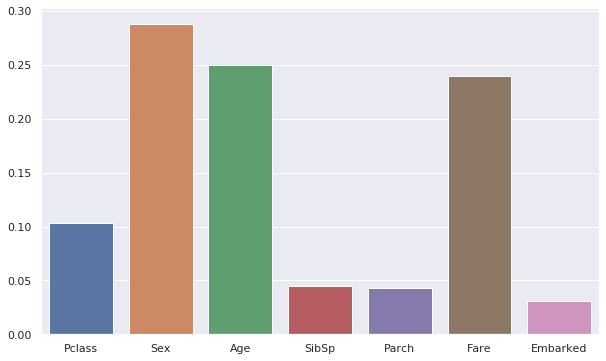

In [12]:
clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X=X, y=y)
importance = clf.feature_importances_
f = plt.figure(figsize=(10,6))
columns = list(X.columns)
sns.barplot(x=columns, y=importance)

In [13]:
import hytests
from importlib import reload
reload(hytests)
from hytests import Hypot

tester = Hypot()
mapping = {'Pclass': 'cat', 'Sex': 'cat', 'SibSp': 'cat', 'Parch': 'cat',
           'Fare': 'cont', 'Age': 'cont', 'Embarked': 'cat'}
p = tester.test(data=X, mapping=mapping)
pprint(p)

[('Pclass_Parch', 0.9060119729573901),
 ('Age_Embarked', 0.610620862556043),
 ('Sex_Embarked', 0.10268761656536965),
 ('Pclass_SibSp', 0.04474247338738836),
 ('Pclass_Sex', 0.030369171735568933),
 ('Sex_SibSp', 0.017258047787724533),
 ('Sex_Age', 0.011974983006815943),
 ('SibSp_Embarked', 0.0069035516623546),
 ('Fare_Age', 0.006235676128300865),
 ('Parch_Embarked', 0.004458071022366027),
 ('Sex_Parch', 0.0016410966262865216),
 ('Pclass_Embarked', 3.09039642159906e-06),
 ('SibSp_Fare', 3.304487762016177e-07),
 ('Sex_Fare', 4.230867870041279e-08),
 ('Parch_Fare', 1.6383228818039053e-11),
 ('Fare_Embarked', 1.6027870913034334e-16),
 ('SibSp_Age', 1.1836227182608997e-18),
 ('Parch_Age', 4.304705321240693e-19),
 ('Pclass_Age', 7.481182472787014e-24),
 ('Pclass_Fare', 1.0313763209141171e-84),
 ('SibSp_Parch', 5.907976157282272e-114)]


In [14]:
X.drop(columns=['Parch', 'Embarked'], inplace=True)


In [15]:
X.head()


,Pclass,Sex,Age,SibSp,Fare
0,3,1,22.0,1,7.2500
1,1,0,38.0,1,71.2833
2,3,0,26.0,0,7.9250
3,1,0,35.0,1,53.1000
4,3,1,35.0,0,8.0500


In [16]:
X = pandas.get_dummies(X, columns=['Pclass'], drop_first=True)


In [17]:
X.head()

,Sex,Age,SibSp,Fare,Pclass_2,Pclass_3
0,1,22.0,1,7.2500,0,1
1,0,38.0,1,71.2833,0,0
2,0,26.0,0,7.9250,0,1
3,0,35.0,1,53.1000,0,0
4,1,35.0,0,8.0500,0,1


Text(0, 0.5, 'TPR')

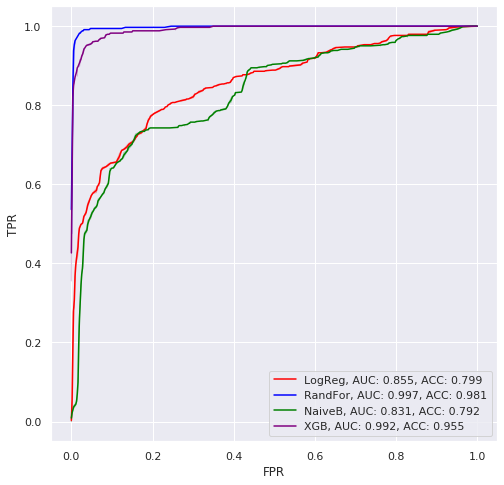

In [18]:
def ml_pipeline(model, X, y):

    model.fit(X, y)
    y_pred = model.predict(X)
    y_probs = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y_true=y, y_score=y_probs)

    auc = round(roc_auc_score(y_true=y, y_score=y_probs), 3)
    acc = round(accuracy_score(y_true=y, y_pred=y_pred), 3)
    conf = confusion_matrix(y_true=y, y_pred=y_pred)

    return acc, auc, fpr, tpr, conf

log_reg = LogisticRegression()
rand_for = RandomForestClassifier()
naive_b = GaussianNB()
xgb = XGBClassifier()

acc, auc, fpr, tpr, conf = ml_pipeline(log_reg, X, y)
acc1, auc1, fpr1, tpr1, conf1 = ml_pipeline(rand_for, X, y)
acc2, auc2, fpr2, tpr2, conf2 = ml_pipeline(naive_b, X, y)
acc3, auc3, fpr3, tpr3, conf3 = ml_pipeline(xgb, X, y)

plt.figure(figsize=(8, 8))
sns.lineplot(x=fpr, y=tpr, color='red', label=f"LogReg, AUC: {auc}, ACC: {acc}")
sns.lineplot(x=fpr1, y=tpr1, color='blue', label=f"RandFor, AUC: {auc1}, ACC: {acc1}")
sns.lineplot(x=fpr2, y=tpr2, color='green', label=f"NaiveB, AUC: {auc2}, ACC: {acc2}")
sns.lineplot(x=fpr3, y=tpr3, color='purple', label=f"XGB, AUC: {auc3}, ACC: {acc3}")
plt.xlabel('FPR')
plt.ylabel('TPR')

In [20]:
print('Logreg\n', conf)
print('RandFor\n', conf1)
print('NaiveB\n', conf2)
print('XGB\n',conf3)

Logreg
 [[476  73]
 [106 236]]
RandFor
 [[543   6]
 [ 11 331]]
NaiveB
 [[467  82]
 [103 239]]
XGB
 [[535  14]
 [ 26 316]]


In [21]:
params = {'bootstrap': [True, False],
 'max_depth': [2, 5, 10, 40, 60, 80, 100],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 400, 600],
 'random_state': [0]}

grid_search = GridSearchCV(estimator = rand_for,
                           param_grid = params,
                           cv = 3,
                           n_jobs = 10,
                           verbose = 2)
grid_search.fit(X=X, y=y)
print(grid_search.best_params_)

Fitting 3 folds for each of 1512 candidates, totalling 4536 fits
{'bootstrap': True, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    2.0s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    9.2s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:   21.4s
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:   41.1s
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 2572 tasks      | elapsed:  3.0min
[Parallel(n_jobs=10)]: Done 3261 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  4.5min
[Parallel(n_jobs=10)]: Done 4536 out of 4536 | elapsed:  5.1min finished


Text(0, 0.5, 'TPR')

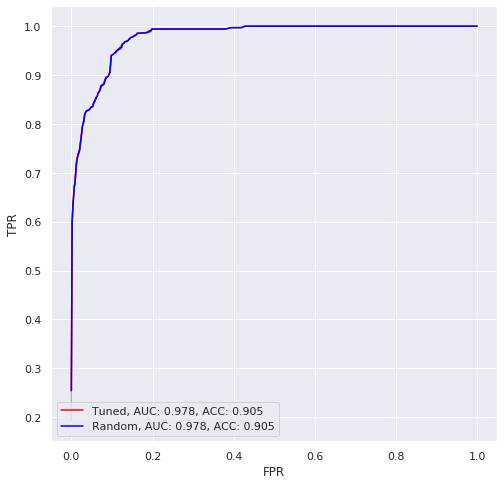

In [26]:
model = RandomForestClassifier(bootstrap=True,
                               max_depth=100,
                               max_features='auto',
                               min_samples_leaf=2,
                               min_samples_split=5,
                               n_estimators=100,
                               random_state=0)

rand = RandomForestClassifier(random_state=0)

acc, auc, fpr, tpr, conf = ml_pipeline(model, X, y)
acc1, auc1, fpr1, tpr1, conf1 = ml_pipeline(model, X, y)
plt.figure(figsize=(8, 8))
sns.lineplot(x=fpr, y=tpr, color='red', label=f"Tuned, AUC: {auc}, ACC: {acc}")
sns.lineplot(x=fpr1, y=tpr1, color='blue', label=f"Random, AUC: {auc1}, ACC: {acc1}")
plt.xlabel('FPR')
plt.ylabel('TPR')

In [70]:
X_test = pandas.read_csv('./data/test.csv')
X_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [72]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [73]:
pas_id = X_test['PassengerId']
X_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [74]:
fill = {'Age': data['Age'].mean(skipna=True),
        'Fare': data['Fare'].mean(skipna=True)}

X_test.fillna(fill, inplace=True)

In [75]:
X_test.isnull().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [76]:
X_test['Sex'] = sex_l.fit_transform(X_test['Sex'])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [77]:
X_test.drop(columns=['Embarked', 'Parch'], inplace=True)

In [78]:
X_test = pandas.get_dummies(X_test, columns=['Pclass'], drop_first=True)
X_test.head()

,Sex,Age,SibSp,Fare,Pclass_2,Pclass_3
0,1,34.5,0,7.8292,0,1
1,0,47.0,1,7.0000,0,1
2,1,62.0,0,9.6875,1,0
3,1,27.0,0,8.6625,0,1
4,0,22.0,1,12.2875,0,1


In [86]:
predictions = model.predict(X_test)
submission = pandas.DataFrame({'PassengerId': pas_id.values,
                               'Survived': predictions})
submission.to_csv('./submission.csv', index=False)